### 우리 나라 인구 소멸 위기 지역 분석

- 이상호 한국고용정보원 연구원의 <한국의 지방소멸에 관한 7가지 분석> 보고서
- 인구 소멸 지역의 정의 : 65세 이상 노인 인구와 20~39세 여성 인구를 비교해서 
- 젊은 여성 인구가 노인 인구의 절반에 미달할 경우 인구 소멸 위험 징역으로 분류

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'


##### 1. 2021년 연령별 총인구 다운로드
- KOSIS : 인구 > 인구총조사 > 인구부문 > 총조사인구(2015) > 전수부문(등록센서스, 2015) > 전수기본표 > 성, 연령 및 세대구성별 인구 - 시군구 (년2015~2021) 선택
- 각 지역별 항목, 필요한 연령대별 항목 선택해서 데이터를 받아야 함.

In [2]:
df = pd.read_csv('data/연령별총인구수_2021년.csv', encoding='euc-kr')
df.head()

,행정구역,행정구역별(시군구),성별,합계,15세미만,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
0,전국,전국,계,49063531,5991713,2090046,2670599,3400702,3091042,3424210,3832964,4002153,4336146,3958355,3988108,2902348,2042154,1529990,1092367,710634
1,전국,전국,남자,24270009,3076190,1067714,1284310,1778098,1597987,1744971,1940421,2018169,2160514,1986284,1955827,1394224,952588,666356,425499,220857
2,전국,전국,여자,24793522,2915523,1022332,1386289,1622604,1493055,1679239,1892543,1983984,2175632,1972071,2032281,1508124,1089566,863634,666868,489777
3,서울특별시,서울특별시,계,9009126,911870,357350,535846,788784,701692,677305,690009,710062,755307,674330,695830,540505,385904,286302,184149,113881
4,서울특별시,서울특별시,남자,4334563,468510,179855,227951,381717,349216,338984,342236,350174,366973,327842,327570,251667,177058,128614,77816,38380


##### 2. 데이터 전처리
- 컬럼명 변경, 광역시도 총계는 삭제

In [3]:
df.rename(columns={'행정구역':'광역시도', '행정구역별(시군구)': '시도', '합계':'인구수' }, inplace=True)
df = df[df.광역시도 != df.시도]
df.head()

,광역시도,시도,성별,인구수,15세미만,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
6,서울특별시,종로구,계,133567,11053,4882,9208,12237,9619,8622,9114,10293,11892,10960,10681,8101,5813,5051,3645,2396
7,서울특별시,종로구,남자,64074,5560,2390,3854,6188,4837,4288,4393,4987,5742,5503,5221,3938,2614,2135,1532,892
8,서울특별시,종로구,여자,69493,5493,2492,5354,6049,4782,4334,4721,5306,6150,5457,5460,4163,3199,2916,2113,1504
9,서울특별시,중구,계,113586,8755,3128,7093,10513,9839,9138,8086,7833,9439,8979,9234,7273,5246,4163,2915,1952
10,서울특별시,중구,남자,54479,4472,1485,2809,5007,4889,4604,4149,3937,4617,4464,4527,3495,2451,1793,1156,624


##### 3. 인구 소멸 위기 지역 계산하고 데이터 정리하기
- 20-30대의 인구, 65세 이상 인구수 알기

In [4]:
df.iloc[:, -6:].sum(axis=1)

6      35687
7      16332
8      19355
9      30783
10     14046
       ...  
829    46420
830    55244
831    48064
832    21848
833    26216
Length: 780, dtype: int64

In [5]:
df['20~39세'] = df['20~24세'] + df['25~29세'] + df['30~34세'] + df['35~39세'] #+ df['40~44세'] + df['45~49세']
df['65세이상']  = df.iloc[:, -6:].sum(axis=1)
df.head()

,광역시도,시도,성별,인구수,15세미만,15~19세,20~24세,25~29세,30~34세,35~39세,...,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상,20~39세,65세이상
6,서울특별시,종로구,계,133567,11053,4882,9208,12237,9619,8622,...,11892,10960,10681,8101,5813,5051,3645,2396,39686,64692
7,서울특별시,종로구,남자,64074,5560,2390,3854,6188,4837,4288,...,5742,5503,5221,3938,2614,2135,1532,892,19167,30278
8,서울특별시,종로구,여자,69493,5493,2492,5354,6049,4782,4334,...,6150,5457,5460,4163,3199,2916,2113,1504,20519,34414
9,서울특별시,중구,계,113586,8755,3128,7093,10513,9839,9138,...,9439,8979,9234,7273,5246,4163,2915,1952,36583,58132
10,서울특별시,중구,남자,54479,4472,1485,2809,5007,4889,4604,...,4617,4464,4527,3495,2451,1793,1156,624,17309,26828


In [6]:
pop = pd.pivot_table(df, index=['광역시도', '시도'], 
                     columns=['성별'], 
                     values=['인구수', '20~39세', '65세이상'])
pop

20~39세                         65세이상                      \
성별               계        남자        여자         계        남자        여자   
광역시도 시도                                                                
강원도  강릉시   46408.0   25308.0   21100.0   90854.0   44597.0   46257.0   
     고성군    4091.0    2427.0    1664.0   11684.0    5681.0    6003.0   
     동해시   15787.0    8679.0    7108.0   33760.0   16651.0   17109.0   
     삼척시   11432.0    6545.0    4887.0   27384.0   13375.0   14009.0   
     속초시   16028.0    8792.0    7236.0   31853.0   15688.0   16165.0   
...            ...       ...       ...       ...       ...       ...   
충청북도 진천군   19790.0   10955.0    8835.0   33260.0   16864.0   16396.0   
     청원구   55153.0   29744.0   25409.0   79710.0   40446.0   39264.0   
     청주시  225557.0  118321.0  107236.0  338539.0  168036.0  170503.0   
     충주시   46426.0   25644.0   20782.0   87592.0   43629.0   43963.0   
     흥덕구   78069.0   40703.0   37366.0  107971.0   54045.0   53926.0   

               인구수                      
성별               계        남자        여자  
광역시도 시도                                 
강원도  강릉시  206957.0  103184.0  103773.0  
     고성군   24332.0   12308.0   12024.0  
     동해시   84741.0   42773.0   41968.0  
     삼척시   60053.0   30564.0   29489.0  
     속초시   78070.0   38733.0   39337.0  
...            ...       ...       ...  
충청북도 진천군   80994.0   42125.0   38869.0  
     청원구  188084.0   95995.0   92089.0  
     청주시  816503.0  408392.0  408111.0  
     충주시  202627.0  102215.0  100412.0  
     흥덕구  258217.0  129754.0  128463.0  

[259 rows x 9 columns]

In [7]:
pop['소멸비율'] = pop['20~39세', '여자'] / (pop['65세이상', '계'] )
pop.head()

20~39세                      65세이상                         인구수  \
성별              계       남자       여자        계       남자       여자         계   
광역시도 시도                                                                    
강원도  강릉시  46408.0  25308.0  21100.0  90854.0  44597.0  46257.0  206957.0   
     고성군   4091.0   2427.0   1664.0  11684.0   5681.0   6003.0   24332.0   
     동해시  15787.0   8679.0   7108.0  33760.0  16651.0  17109.0   84741.0   
     삼척시  11432.0   6545.0   4887.0  27384.0  13375.0  14009.0   60053.0   
     속초시  16028.0   8792.0   7236.0  31853.0  15688.0  16165.0   78070.0   

                                  소멸비율  
성별              남자        여자            
광역시도 시도                                 
강원도  강릉시  103184.0  103773.0  0.232241  
     고성군   12308.0   12024.0  0.142417  
     동해시   42773.0   41968.0  0.210545  
     삼척시   30564.0   29489.0  0.178462  
     속초시   38733.0   39337.0  0.227169

- 소멸비율이 1이하면 소멸위기지역

In [8]:
pop['소멸위기지역'] = pop['소멸비율'] < 0.5
pop

20~39세                         65세이상                      \
성별               계        남자        여자         계        남자        여자   
광역시도 시도                                                                
강원도  강릉시   46408.0   25308.0   21100.0   90854.0   44597.0   46257.0   
     고성군    4091.0    2427.0    1664.0   11684.0    5681.0    6003.0   
     동해시   15787.0    8679.0    7108.0   33760.0   16651.0   17109.0   
     삼척시   11432.0    6545.0    4887.0   27384.0   13375.0   14009.0   
     속초시   16028.0    8792.0    7236.0   31853.0   15688.0   16165.0   
...            ...       ...       ...       ...       ...       ...   
충청북도 진천군   19790.0   10955.0    8835.0   33260.0   16864.0   16396.0   
     청원구   55153.0   29744.0   25409.0   79710.0   40446.0   39264.0   
     청주시  225557.0  118321.0  107236.0  338539.0  168036.0  170503.0   
     충주시   46426.0   25644.0   20782.0   87592.0   43629.0   43963.0   
     흥덕구   78069.0   40703.0   37366.0  107971.0   54045.0   53926.0   

               인구수                          소멸비율 소멸위기지역  
성별               계        남자        여자                   
광역시도 시도                                                  
강원도  강릉시  206957.0  103184.0  103773.0  0.232241   True  
     고성군   24332.0   12308.0   12024.0  0.142417   True  
     동해시   84741.0   42773.0   41968.0  0.210545   True  
     삼척시   60053.0   30564.0   29489.0  0.178462   True  
     속초시   78070.0   38733.0   39337.0  0.227169   True  
...            ...       ...       ...       ...    ...  
충청북도 진천군   80994.0   42125.0   38869.0  0.265634   True  
     청원구  188084.0   95995.0   92089.0  0.318768   True  
     청주시  816503.0  408392.0  408111.0  0.316761   True  
     충주시  202627.0  102215.0  100412.0  0.237259   True  
     흥덕구  258217.0  129754.0  128463.0  0.346074   True  

[259 rows x 11 columns]

In [9]:
pop.shape

(259, 11)

In [10]:
pop.to_csv('data/test.csv', encoding='euc-kr')

In [11]:
pop[pop['소멸위기지역'] == True].index.get_level_values(1)

Index(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시', '인제군',
       ...
       '영동군', '옥천군', '음성군', '제천시', '증평군', '진천군', '청원구', '청주시', '충주시', '흥덕구'],
      dtype='object', name='시도', length=256)

##### 4. 시각화하기

In [12]:
pop.reset_index(inplace=True)
tmp_columns = [(pop.columns.get_level_values(0)[n] + ' ' + pop.columns.get_level_values(1)[n]).strip() \
        for n in range(0, len(pop.columns.get_level_values(0))) ]
pop.columns = tmp_columns
pop.head()

,광역시도,시도,20~39세 계,20~39세 남자,20~39세 여자,65세이상 계,65세이상 남자,65세이상 여자,인구수 계,인구수 남자,인구수 여자,소멸비율,소멸위기지역
0,강원도,강릉시,46408.0,25308.0,21100.0,90854.0,44597.0,46257.0,206957.0,103184.0,103773.0,0.232241,True
1,강원도,고성군,4091.0,2427.0,1664.0,11684.0,5681.0,6003.0,24332.0,12308.0,12024.0,0.142417,True
2,강원도,동해시,15787.0,8679.0,7108.0,33760.0,16651.0,17109.0,84741.0,42773.0,41968.0,0.210545,True
3,강원도,삼척시,11432.0,6545.0,4887.0,27384.0,13375.0,14009.0,60053.0,30564.0,29489.0,0.178462,True
4,강원도,속초시,16028.0,8792.0,7236.0,31853.0,15688.0,16165.0,78070.0,38733.0,39337.0,0.227169,True


In [13]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   광역시도       259 non-null    object 
 1   시도         259 non-null    object 
 2   20~39세 계   256 non-null    float64
 3   20~39세 남자  259 non-null    float64
 4   20~39세 여자  259 non-null    float64
 5   65세이상 계    256 non-null    float64
 6   65세이상 남자   259 non-null    float64
 7   65세이상 여자   259 non-null    float64
 8   인구수 계      256 non-null    float64
 9   인구수 남자     259 non-null    float64
 10  인구수 여자     259 non-null    float64
 11  소멸비율       256 non-null    float64
 12  소멸위기지역     259 non-null    bool   
dtypes: bool(1), float64(10), object(2)
memory usage: 24.7+ KB


In [14]:
pop.시도.unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '권선구', '기흥구',
       '김포시', '남양주시', '단원구', '덕양구', '동두천시', '동안구', '만안구', '부천시', '분당구',
       '상록구', '성남시', '수원시', '수정구', '수지구', '시흥시', '안산시', '안성시', '안양시',
       '양주시', '양평군', '여주시', '연천군', '영통구', '오산시', '용인시', '의왕시', '의정부시',
       '이천시', '일산동구', '일산서구', '장안구', '중원구', '처인구', '파주시', '팔달구', '평택시',
       '포천시', '하남시', '화성시', '거제시', '거창군', '김해시', '남해군', '마산합포구', '마산회원구',
       '밀양시', '사천시', '산청군', '성산구', '양산시', '의령군', '의창구', '진주시', '진해구',
       '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군', '합천군', '경산시', '경주시',
       '구미시', '군위군', '김천시', '남구', '문경시', '봉화군', '북구', '상주시', '성주군', '안동시',
       '영덕군', '영양군', '영주시', '영천시', '예천군', '울릉군', '울진군', '의성군', '청송군',
       '칠곡군', '포항시', '광산구', '동구', '서구', '달서구', '달성군', '수성구', '중구', '대덕구',
       '유성구', '강서구', '금정구', '기장군', '동래구', '부산진구', '사상구', '사하구', '수영구',
 

- geo~.json 의 시도 이름과 테이블의 시도 이름 일치시키기

In [15]:
tmp_gu_dict = {
    '수원' : ['장안구', '권선구', '팔달구', '영통구'],
    '성남' : ['수정구', '중원구', '분당구'], 
    '안양' : ['만안구', '동안구'],
    '안산' : ['상록구', '단원구'],
    '고양' : ['덕양구', '일산동구', '일산서구'],
    '용인' : ['처인구', '기흥구', '수지구'], 
    '청주' : ['상당구', '서원구', '흥덕구', '청원구'],
    '천안' : ['동남구', '서북구'],
    '전주' : ['완산구', '덕진구'],
    '포항' : ['남구', '북구'],
    '창원' : ['의창구', '성산구', '진해구', '마산합포구', '마산회원구']
}

In [16]:
tmp_gu_dict.keys()

dict_keys(['수원', '성남', '안양', '안산', '고양', '용인', '청주', '천안', '전주', '포항', '창원'])

In [17]:
indexs = pop[pop.시도.apply(lambda x : x.replace('시', '') in tmp_gu_dict.keys())].index
pop.drop(pop.index[indexs], inplace=True)
pop.set_index('광역시도', inplace=True)
pop.reset_index(inplace=True)
pop.shape

(248, 13)

In [18]:
def get_guname(g_name, s_name):
    si_name = [None] * len(g_name)
    for n in range(len(g_name)):
        if g_name[n][-3:] not in ['광역시', '특별시', '자치시']:
            if s_name[n][:-1] == '고성' and g_name[n] == '강원도':
                si_name[n] = '고성(강원)'
            elif s_name[n][:-1] == '고성' and g_name[n] == '경상남도':
                si_name[n] = '고성(경남)'
            else:
                si_name[n] = s_name[n][:-1]
            
            for key, values in tmp_gu_dict.items():
                if s_name[n] in values:
                    if len(s_name[n]) == 2:
                        si_name[n] = key + ' ' + s_name[n]
                    elif s_name[n] in ['마산합포구', '마산회원구']:
                        si_name[n] = key + ' ' + s_name[n][2:-1]
                    else:
                        si_name[n] = key + ' ' + s_name[n][:-1]

        elif g_name[n] == '세종특별자치시':
            si_name[n] = '세종'

        else:
            if len(s_name[n]) == 2:
                si_name[n] = g_name[n][:2] + ' ' + s_name[n]
            else:
                si_name[n] = g_name[n][:2] + ' ' + s_name[n][:-1]
                # print(g_name[n][:2] + ' ' + s_name[n][:2])

    return si_name

In [19]:
pop['ID'] = get_guname(pop['광역시도'], pop['시도'])

In [20]:
pop.tail(20)

,광역시도,시도,20~39세 계,20~39세 남자,20~39세 여자,65세이상 계,65세이상 남자,65세이상 여자,인구수 계,인구수 남자,인구수 여자,소멸비율,소멸위기지역,ID
228,충청남도,서천군,6063.0,3414.0,2649.0,24042.0,11140.0,12902.0,46866.0,23003.0,23863.0,0.110182,True,서천
229,충청남도,아산시,82664.0,43581.0,39083.0,124301.0,61736.0,62565.0,311911.0,160310.0,151601.0,0.314422,True,아산
230,충청남도,예산군,11338.0,6253.0,5085.0,34809.0,16579.0,18230.0,71618.0,35719.0,35899.0,0.146083,True,예산
231,충청남도,청양군,3884.0,2184.0,1700.0,14383.0,6849.0,7534.0,28071.0,14187.0,13884.0,0.118195,True,청양
232,충청남도,태안군,8700.0,5057.0,3643.0,27343.0,13342.0,14001.0,57138.0,28826.0,28312.0,0.133233,True,태안
233,충청남도,홍성군,18820.0,9852.0,8968.0,41831.0,19776.0,22055.0,95155.0,47148.0,48007.0,0.214386,True,홍성
234,충청북도,괴산군,4739.0,2761.0,1978.0,17123.0,8354.0,8769.0,34349.0,17542.0,16807.0,0.115517,True,괴산
235,충청북도,단양군,3278.0,1831.0,1447.0,11808.0,5657.0,6151.0,25772.0,13041.0,12731.0,0.122544,True,단양
236,충청북도,보은군,3802.0,2112.0,1690.0,14442.0,6694.0,7748.0,29357.0,14642.0,14715.0,0.117020,True,보은
237,충청북도,상당구,44320.0,22774.0,21546.0,73485.0,35565.0,37920.0,184612.0,90996.0,93616.0,0.293203,True,청주 상당


In [21]:
pop_folium = pop.set_index('ID')
pop_folium.head()

,광역시도,시도,20~39세 계,20~39세 남자,20~39세 여자,65세이상 계,65세이상 남자,65세이상 여자,인구수 계,인구수 남자,인구수 여자,소멸비율,소멸위기지역
ID,,,,,,,,,,,,,
강릉,강원도,강릉시,46408.0,25308.0,21100.0,90854.0,44597.0,46257.0,206957.0,103184.0,103773.0,0.232241,True
고성(강원),강원도,고성군,4091.0,2427.0,1664.0,11684.0,5681.0,6003.0,24332.0,12308.0,12024.0,0.142417,True
동해,강원도,동해시,15787.0,8679.0,7108.0,33760.0,16651.0,17109.0,84741.0,42773.0,41968.0,0.210545,True
삼척,강원도,삼척시,11432.0,6545.0,4887.0,27384.0,13375.0,14009.0,60053.0,30564.0,29489.0,0.178462,True
속초,강원도,속초시,16028.0,8792.0,7236.0,31853.0,15688.0,16165.0,78070.0,38733.0,39337.0,0.227169,True


In [22]:
pop_folium.index.values

array(['강릉', '고성(강원)', '동해', '삼척', '속초', '양구', '양양', '영월', '원주', '인제',
       '정선', '철원', '춘천', '태백', '평창', '홍천', '화천', '횡성', '가평', '과천', '광명',
       '광주', '구리', '군포', '수원 권선', '용인 기흥', '김포', '남양주', '안산 단원', '고양 덕양',
       '동두천', '안양 동안', '안양 만안', '부천', '성남 분당', '안산 상록', '성남 수정', '용인 수지',
       '시흥', '안성', '양주', '양평', '여주', '연천', '수원 영통', '오산', '의왕', '의정부',
       '이천', '고양 일산동', '고양 일산서', '수원 장안', '성남 중원', '용인 처인', '파주', '수원 팔달',
       '평택', '포천', '하남', '화성', '거제', '거창', '고성(경남)', '김해', '남해', '창원 합포',
       '창원 회원', '밀양', '사천', '산청', '창원 성산', '양산', '의령', '창원 의창', '진주',
       '창원 진해', '창녕', '통영', '하동', '함안', '함양', '합천', '경산', '경주', '구미',
       '군위', '김천', '포항 남구', '문경', '봉화', '포항 북구', '상주', '성주', '안동', '영덕',
       '영양', '영주', '영천', '예천', '울릉', '울진', '의성', '청송', '칠곡', '광주 광산',
       '광주 남구', '광주 동구', '광주 북구', '광주 서구', '대구 남구', '대구 달서', '대구 달성',
       '대구 동구', '대구 북구', '대구 서구', '대구 수성', '대구 중구', '대전 대덕', '대전 동구',
       '대전 서구', '대전 유성', '대전 중구', '부산 강서', '부산 금정', '부산 기장', '부산 

In [23]:
import folium
import json
import warnings
warnings.filterwarnings('ignore')

In [24]:
geo_path = 'data/05. skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))

In [25]:
gmap = folium.Map(location=[36.2002, 127.054], zoom_start=7)

folium.Choropleth(geo_data=geo_data, 
               data=pop_folium['인구수 계'],
               columns = [pop_folium.index, pop_folium['인구수 계']],
               fill_color='YlGnBu', #PuRd, YlGnBu
               key_on='feature.id'
).add_to(gmap)

title_html='<h3 align="center" style="font-size:20px;">전국 인구</h3>'
gmap.get_root().html.add_child(folium.Element(title_html))
gmap


##### 5. Catogram으로 우리나라 지도 만들기

In [26]:
draw_korea_raw = pd.read_excel('data/draw_korea_raw(2021).xlsx')
draw_korea_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,춘천,인제,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,파주,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,NaN,고양 일산서,고양 덕양,서울 강북,서울 성북,가평,구리,양평,평창,강릉,NaN,NaN
4,NaN,NaN,김포,광명,서울 은평,서울 서대문,서울 종로,서울 동대문,서울 중랑,여주,정선,동해,NaN,NaN
5,NaN,인천 강화,부천,안양 만안,서울 강서,서울 마포,서울 중구,서울 성동,서울 강동,이천,원주,삼척,NaN,NaN
6,NaN,인천 서구,인천 동구,안양 동안,서울 양천,서울 동작,서울 용산,서울 광진,서울 송파,하남,영월,울진,NaN,NaN
7,NaN,NaN,인천 계양,시흥,서울 금천,서울 영등포,서울 서초,서울 강남,성남 중원,광주,태백,봉화,NaN,NaN
8,NaN,NaN,인천 부평,안산 상록,서울 구로,서울 관악,과천,성남 분당,성남 수정,용인 처인,영주,영양,NaN,울릉
9,NaN,인천 중구,인천 미추홀,안산 단원,군포,의왕,수원 권선,수원 영통,용인 수지,용인 기흥,예천,영덕,NaN,NaN


In [27]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked

0
0  7       철원
   8       화천
   9       양구
   10  고성(강원)
1  3       양주
...       ...
24 2       장흥
   3       보성
25 2       완도
   5       제주
26 5      서귀포

[250 rows x 1 columns]

In [28]:
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked

,level_0,level_1,0
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
245,24,2,장흥
246,24,3,보성
247,25,2,완도
248,25,5,제주


In [29]:
draw_korea_raw_stacked.rename(columns={'level_0': 'y', 'level_1': 'x', 0 :'ID'}, inplace=True)
draw_korea = draw_korea_raw_stacked
draw_korea

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
245,24,2,장흥
246,24,3,보성
247,25,2,완도
248,25,5,제주


In [71]:
BORDER_LINES = [
    [(5, 1), (5, 2), (7, 2), (7, 3), (11, 3), (11, 0)],        # 인천
    [(5, 4), (5, 5), (2, 5), (2, 7), (4, 7), (4, 9), (7, 9), (7, 7), (9, 7), (9, 5), (10, 5), (10, 4), (5, 4)], # 서울
    [(1, 7), (1, 8), (3, 8), (3, 10), (10, 10), (10, 7), (12, 7), (12, 6), (11, 6), (11, 5), (12, 5), (12, 4), (11, 4), (11, 3)], # 경기도
    [(8, 10), (8, 11), (6, 11), (6, 12)], # 강원도
    [(12, 5), (13, 5), (13, 4), (14, 4), (14, 5), (15, 5), (15, 4), (16, 4), (16, 2)], # 충청북도
    [(16, 4), (17, 4), (17, 5), (16, 5), (16, 6), (19, 6), (19, 5), (20, 5), (20, 4), (21, 4), (21, 3), (19, 3), (19, 1)], # 전라북도
    [(13, 5), (13, 6), (16, 6)], # 대전시
    [(13, 5), (14, 5)], # 세종시
    [(21, 2), (21, 3), (22, 3), (22, 4), (24, 4), (24, 2), (21, 2)], # 광주
    [(20, 5), (21, 5), (21, 6), (23, 6)],   # 전라남도
    [(10, 8), (12, 8), (12, 9), (14, 9), (14, 8), (16, 8), (16, 6)], # 충청북도
    [(14, 9), (14, 11), (14, 12), (13, 12), (13, 13)], # 경상북도
    [(15, 8), (17, 8), (17, 10), (16, 10), (16, 11), (14, 11)], # 대구
    [(17, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10), (21, 10)], # 부산
    [(16, 11), (16, 13)], # 울산
#   [(9, 14), 9, 15)],
    [(27, 5), (27, 6), (25, 6)]
]

In [31]:
draw_korea.iterrows()

<generator object DataFrame.iterrows at 0x0000028D6BDD0F20>

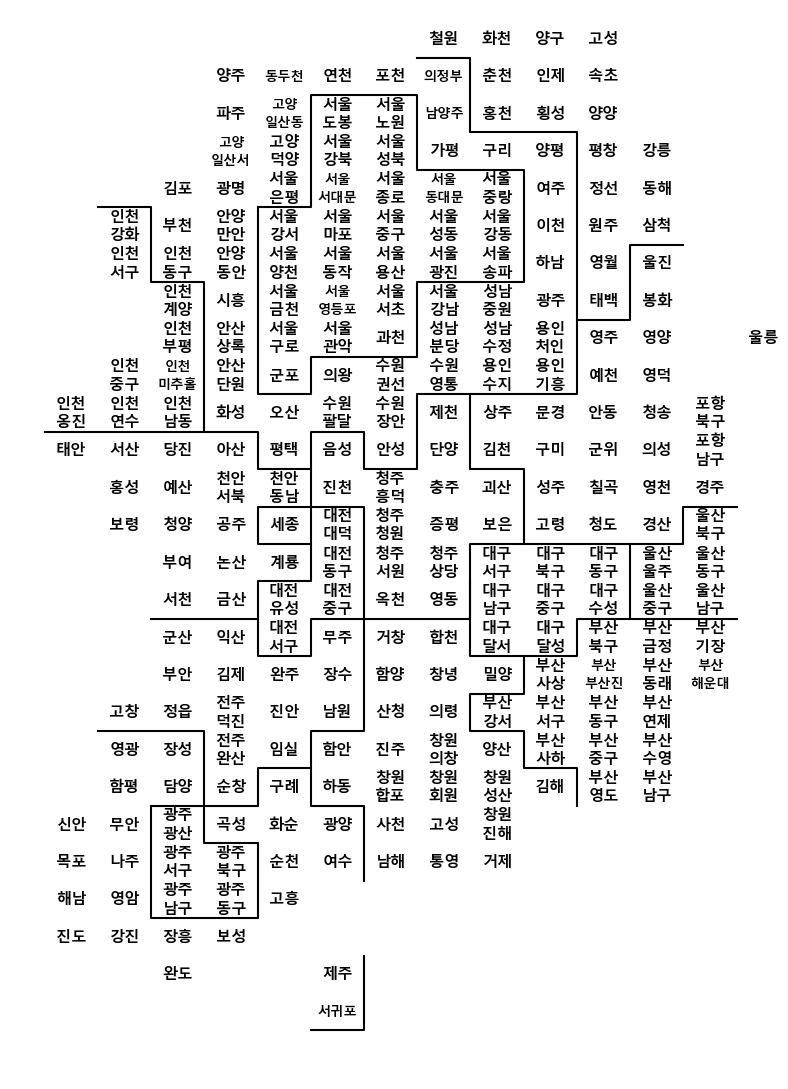

In [72]:
plt.figure(figsize=(8, 11))

# 지역 이름 표시
for idx, row in draw_korea.iterrows():
    # print(row['ID'])
    # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다.
    # (중구, 서구)
    if len(row['ID'].split()) == 2:
        dispname = f"{row['ID'].split()[0]}\n{row['ID'].split()[1]}"
    elif row['ID'][:2] == '고성':
        dispname = '고성'
    else:
        dispname = row['ID']

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에  작은 글자로 표시한다.
    # splitlines() : \n기준으로 split
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x'] + 0.5, row['y'] + 0.5), weight='bold', 
                 fontsize=fontsize, ha='center', va='center', linespacing=linespacing)
    
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)
plt.gca().invert_yaxis()
plt.axis('off')
plt.tight_layout()
plt.show()